# Compressing Data via Dimensionality Reduction

From Machine Learning with PyTorch and Scikit-Learn (Chapter 5)

https://learning.oreilly.com/library/view/machine-learning-with/9781801819312/Text/Chapter_5.xhtml#_idParaDest-94 

## Unsupervised dimensionality reduction via principal component analysis (PCA)

In [36]:
import pandas as pdd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Import UCI wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(url, header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Separate the training and test datasets—using 70 percent and 30 percent of the data, respectively—and standardize it to unit variance

In [5]:
# Separate training and testing datasets
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values # Create feature matrix and target vector
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

Now we standardize (scale) the features

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Standardize features (mean=0 and variance=1)
X_train_std = sc.fit_transform(X_train) # Fit to training data, then transform it
X_test_std = sc.transform(X_test) # Only transform testing data

In [7]:
# Eigendecomposition of the covariance matrix
import numpy as np
cov_mat = np.cov(X_train_std.T) # Calculate covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # Calculate eigenvalues and eigenvectors

# Print the eigenvalues and eigenvectors
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Now we calculate the cumulative sum of explained variances.

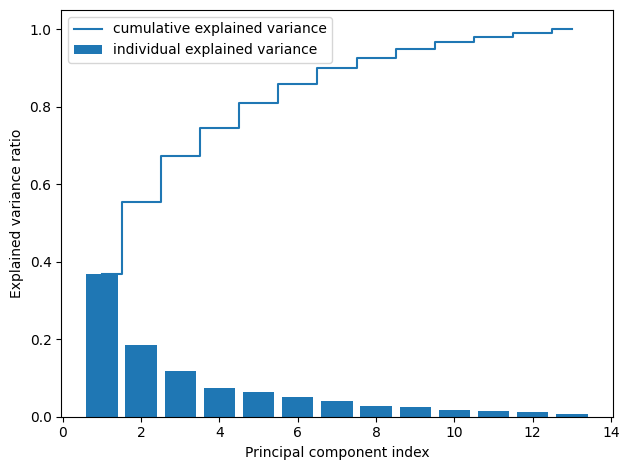

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Final three steps:

1. Sort the eignenpairs by descending order of the eigenvalues
2. Construct a projection matrix from the seleceted eigenvectors
3. Use the projection matrix to transform the data into a lower dimensional subspace

In [9]:
# Sort the eigenpairs by decreasing order of the eigenvalues. Creates a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))] 

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True) # Use lambda function to sort by first element of tuple

In [10]:
# Target the top two eigenvectors that capture about 60% of the variance
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis])) # Stack arrays in sequence horizontally
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
X_train_std[0].dot(w) # Dot product of the first training sample and the projection matrix

array([2.38299011, 0.45458499])

We can transform the entire 124×13-dimensional training dataset onto the two principal components by calculating the matrix dot product

In [12]:
X_train_pca = X_train_std.dot(w) # Transform the entire training dataset

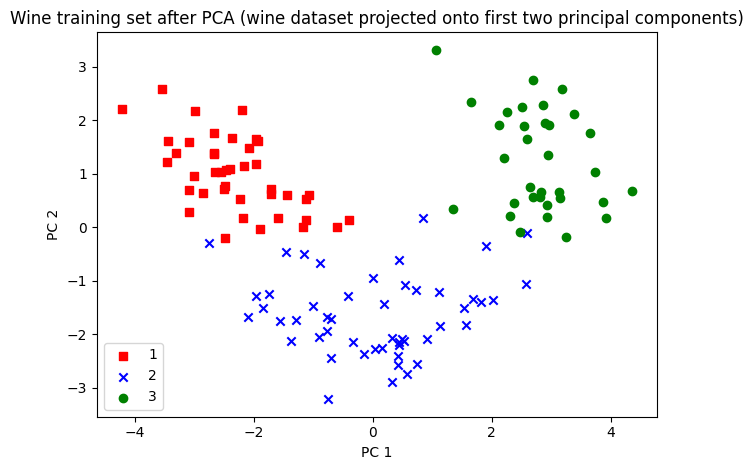

In [13]:
# Visualize the transformed Wine training set
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Wine training set after PCA (wine dataset projected onto first two principal components)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Assess feature contribution

In [14]:
loadings = eigen_vecs * np.sqrt(eigen_vals) # Calculate the loadings

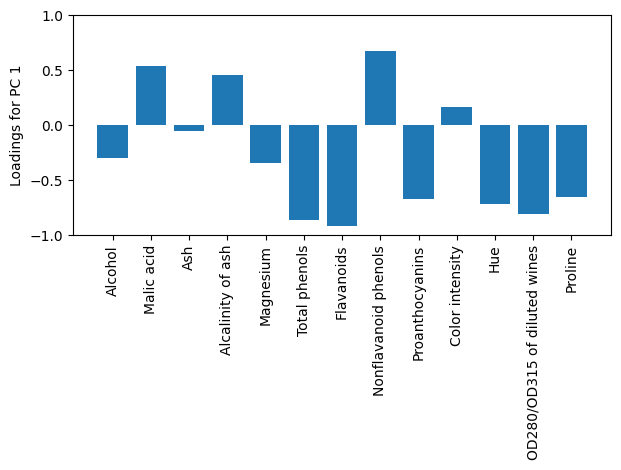

In [18]:
# Plot the loadings for the first principal component
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation=90)
plt.ylim([-1, 1])
plt.tight_layout()
plt.show()

## Principal component analysis in scikit-learn

In [41]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], # x1
                    y=X[y == cl, 1], #
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components=2) # Initialize PCA
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs') # Initialize logistic regression

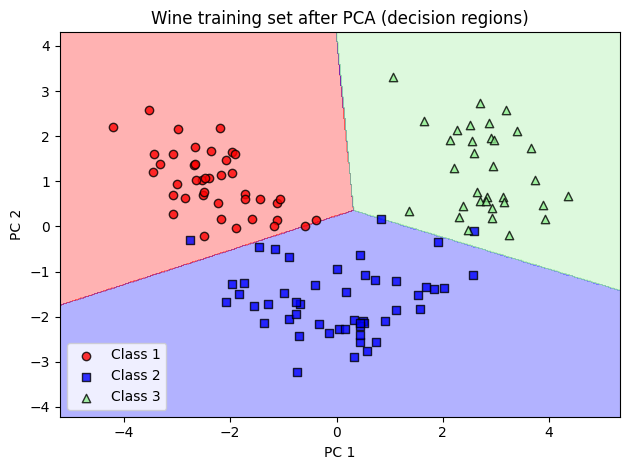

In [44]:
# dimensionality reduction
X_train_pca = pca.fit_transform(X_train_std) # Fit the PCA and transform the training dataset
X_test_pca = pca.transform(X_test_std) # Transform the testing dataset

# fit the logistic regression model on the reduced dataset
lr.fit(X_train_pca, y_train)

# plot the decision regions
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Wine training set after PCA (decision regions)')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()


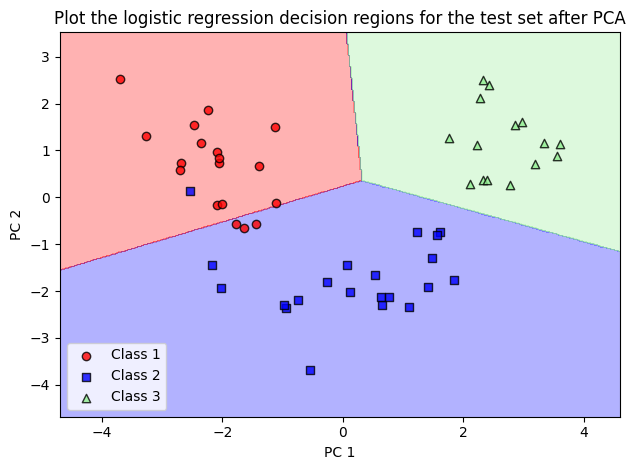

In [45]:
# Plot the decision regions for the test set
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Plot the logistic regression decision regions for the test set after PCA')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()